## **1. Project Title and Introduction**

In [11]:
# ================================================================
#                    UBER TRIPS DATA ANALYSIS
#                   Internship Project - Vcodez
#                     Author: Suriyaprakash
# ================================================================

print("Uber Trips Data Analysis - Internship Project (Vcodez)")
print("Author: Suriyaprakash")

Uber Trips Data Analysis - Internship Project (Vcodez)
Author: Suriyaprakash


## **2. Install & Import Required Libraries**

In [12]:
!pip install plotly ipywidgets seaborn --quiet
from google.colab import output
output.enable_custom_widget_manager()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, Dropdown
from IPython.display import display, clear_output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00


## **3. Load Dataset**

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("uber_trips_chennai.csv", parse_dates=["timestamp"])
df.head()

,trip_id,city,timestamp,pickup_zone,pickup_lat,pickup_lng,drop_zone,drop_lat,drop_lng,distance_km,trip_duration_min,fare_inr,payment_type,platform,is_shared,driver_id,customer_id
0,1502,Chennai,2024-03-29 07:24:00,Velachery,12.989118,80.208643,Ambattur,13.100438,80.154493,13.64,20,308.18,UPI,App,0,D0361,C000322
1,2587,Chennai,2024-03-01 06:27:00,Kodambakkam,13.067049,80.216374,Besant Nagar,12.982317,80.247181,10.85,34,231.93,Cash,App,0,D0611,C000688
2,2654,Chennai,2024-01-17 11:03:00,Velachery,12.988139,80.218606,Sholinganallur,12.927868,80.220284,7.98,34,149.47,UPI,App,1,D0360,C007374
3,1056,Chennai,2024-01-02 20:31:00,Madhavaram,13.143002,80.226513,Velachery,12.987756,80.223668,17.07,50,266.57,UPI,Call,0,D0552,C003563
4,706,Chennai,2024-01-03 12:17:00,Besant Nagar,12.977208,80.259067,Perambur,13.104840,80.213597,15.83,39,252.40,Cash,App,0,D0549,C006523


## **4. Basic Info & Structure**

In [ ]:
# Inspect data structure
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   trip_id            5000 non-null   int64         
 1   city               5000 non-null   object        
 2   timestamp          5000 non-null   datetime64[ns]
 3   pickup_zone        5000 non-null   object        
 4   pickup_lat         4900 non-null   float64       
 5   pickup_lng         4900 non-null   float64       
 6   drop_zone          5000 non-null   object        
 7   drop_lat           5000 non-null   float64       
 8   drop_lng           5000 non-null   float64       
 9   distance_km        4900 non-null   float64       
 10  trip_duration_min  5000 non-null   int64         
 11  fare_inr           4900 non-null   float64       
 12  payment_type       5000 non-null   object        
 13  platform           5000 non-null   object        
 14  is_share

((5000, 17), None)

## **5. Summary Statistics**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
trip_id,5000.0,NaN,NaN,NaN,2500.5,1.0,1250.75,2500.5,3750.25,5000.0,1443.520003
city,5000,1,Chennai,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,5000,NaN,NaN,NaN,2024-02-15 18:29:24.504000,2024-01-01 00:53:00,2024-01-25 01:17:30,2024-02-15 19:37:30,2024-03-08 21:18:15,2024-03-31 23:38:00,NaN
pickup_zone,5000,15,Thiruvanmiyur,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_lat,4900.0,NaN,NaN,NaN,13.025211,12.909225,12.979087,13.015566,13.080833,13.165239,0.064991
pickup_lng,4900.0,NaN,NaN,NaN,80.215563,80.109111,80.206611,80.222316,80.244338,80.293365,0.041974
drop_zone,5000,15,Madhavaram,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drop_lat,5000.0,NaN,NaN,NaN,13.025152,12.908643,12.978655,13.015356,13.081857,13.166141,0.06566
drop_lng,5000.0,NaN,NaN,NaN,80.216517,80.110301,80.207552,80.223152,80.246191,80.287416,0.041882
distance_km,4900.0,NaN,NaN,NaN,9.682492,0.5,4.23,9.295,14.45,29.28,6.318274


## **6. Missing Values**

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
pickup_lat,100
fare_inr,100
pickup_lng,100
distance_km,100
trip_id,0
pickup_zone,0
drop_zone,0
timestamp,0
city,0
drop_lng,0


## **7. Descriptive Statistics for Distance, Fare & Trip Duration**

In [ ]:
df[["distance_km", "fare_inr", "trip_duration_min"]].describe()

,distance_km,fare_inr,trip_duration_min
count,4900.000000,4900.000000,5000.000000
mean,9.682492,204.516416,24.246200
std,6.318274,116.732721,15.649938
min,0.500000,40.000000,5.000000
25%,4.230000,104.565000,10.000000
50%,9.295000,193.580000,22.000000
75%,14.450000,287.887500,35.250000
max,29.280000,644.490000,85.000000


## **8. Top 10 Most Frequent Pickup Zones and Drop Zones**

In [ ]:
df["pickup_zone"].value_counts().head(10)
df["drop_zone"].value_counts().head(10)

,count
drop_zone,
Madhavaram,376
Mylapore,353
Thiruvanmiyur,349
Ambattur,347
Velachery,342
Besant Nagar,342
Sholinganallur,342
T. Nagar,331
Adyar,329


## **9. Missing Values Count for Each Column**

In [ ]:
df.isnull().sum()

,0
trip_id,0
city,0
timestamp,0
pickup_zone,0
pickup_lat,100
pickup_lng,100
drop_zone,0
drop_lat,0
drop_lng,0
distance_km,100


## **10. Total Number of Duplicate Rows in the Dataset**

In [ ]:
df.duplicated().sum()

np.int64(0)

## **11. Count of Unique Values in Each Column**

In [ ]:
df.nunique()

,0
trip_id,5000
city,1
timestamp,4905
pickup_zone,15
pickup_lat,4843
pickup_lng,4770
drop_zone,15
drop_lat,4939
drop_lng,4853
distance_km,1941


## **12. Frequency Count of All Unique Rows in the Dataset**

In [ ]:
df.value_counts()

,,,,,,,,,,,,,,,,,count
trip_id,city,timestamp,pickup_zone,pickup_lat,pickup_lng,drop_zone,drop_lat,drop_lng,distance_km,trip_duration_min,fare_inr,payment_type,platform,is_shared,driver_id,customer_id,
4983,Chennai,2024-01-06 09:30:00,Tambaram,12.924171,80.132299,Velachery,12.992503,80.218735,11.15,16,221.48,Card,App,1,D0534,C000113,1
4981,Chennai,2024-02-07 11:08:00,T. Nagar,13.048958,80.240020,Besant Nagar,12.977524,80.246056,7.61,30,156.41,Cash,Call,0,D0133,C002326,1
4980,Chennai,2024-03-12 12:22:00,Besant Nagar,12.978948,80.258918,Ambattur,13.098333,80.156645,17.45,35,308.08,Cash,Call,0,D0029,C004028,1
4978,Chennai,2024-03-28 15:12:00,Velachery,12.988821,80.216111,Madhavaram,13.151615,80.217214,17.23,34,307.01,Card,App,0,D0464,C004636,1
4976,Chennai,2024-01-09 16:01:00,Kodambakkam,13.063365,80.220727,Mylapore,13.021226,80.272839,7.64,21,186.77,Card,App,0,D0393,C002127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Chennai,2024-01-26 00:48:00,Besant Nagar,12.987448,80.261660,Sholinganallur,12.934351,80.217788,6.91,15,173.44,Card,App,0,D0798,C001898,1
4,Chennai,2024-03-08 11:56:00,Tambaram,12.931626,80.137314,Besant Nagar,12.975348,80.254292,13.92,31,234.27,Cash,App,0,D0731,C006591,1
3,Chennai,2024-01-03 06:38:00,Sholinganallur,12.925676,80.238623,Adyar,13.009262,80.251191,9.53,11,230.90,Card,App,1,D0047,C003799,1


## **13. Filling Missing Values Using Forward Fill (FFill) Method**

In [ ]:
df.fillna(method='ffill',inplace=True)

/tmp/ipython-input-4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


## **14. Extracting Date, Hour, Weekday, and Month from Timestamp**

In [ ]:
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.day_name()
df["month"] = df["timestamp"].dt.month_name()

## **15. Preview of First 10 Rows of the Updated Dataset**

In [ ]:
df.head(10)

,trip_id,city,timestamp,pickup_zone,pickup_lat,pickup_lng,drop_zone,drop_lat,drop_lng,distance_km,...,fare_inr,payment_type,platform,is_shared,driver_id,customer_id,date,hour,weekday,month
0,1502,Chennai,2024-03-29 07:24:00,Velachery,12.989118,80.208643,Ambattur,13.100438,80.154493,13.64,...,308.18,UPI,App,0,D0361,C000322,2024-03-29,7,Friday,March
1,2587,Chennai,2024-03-01 06:27:00,Kodambakkam,13.067049,80.216374,Besant Nagar,12.982317,80.247181,10.85,...,231.93,Cash,App,0,D0611,C000688,2024-03-01,6,Friday,March
2,2654,Chennai,2024-01-17 11:03:00,Velachery,12.988139,80.218606,Sholinganallur,12.927868,80.220284,7.98,...,149.47,UPI,App,1,D0360,C007374,2024-01-17,11,Wednesday,January
3,1056,Chennai,2024-01-02 20:31:00,Madhavaram,13.143002,80.226513,Velachery,12.987756,80.223668,17.07,...,266.57,UPI,Call,0,D0552,C003563,2024-01-02,20,Tuesday,January
4,706,Chennai,2024-01-03 12:17:00,Besant Nagar,12.977208,80.259067,Perambur,13.104840,80.213597,15.83,...,252.40,Cash,App,0,D0549,C006523,2024-01-03,12,Wednesday,January
5,107,Chennai,2024-03-26 06:09:00,Tambaram,12.928306,80.132782,Adyar,13.011949,80.249988,15.69,...,263.21,Card,App,0,D0147,C001373,2024-03-26,6,Tuesday,March
6,590,Chennai,2024-02-10 05:12:00,Tambaram,12.926544,80.123945,Anna Nagar,13.085074,80.200740,18.87,...,284.10,Card,App,0,D0378,C002579,2024-02-10,5,Saturday,February
7,2469,Chennai,2024-01-29 18:36:00,Adyar,13.013886,80.245824,Adyar,13.019218,80.255978,1.33,...,45.45,Cash,App,0,D0553,C007303,2024-01-29,18,Monday,January
8,2414,Chennai,2024-01-31 07:35:00,T. Nagar,13.044295,80.235618,T. Nagar,13.040132,80.228649,1.33,...,63.71,Cash,App,0,D0224,C007940,2024-01-31,7,Wednesday,January
9,1601,Chennai,2024-03-07 02:04:00,T. Nagar,13.035774,80.236249,T. Nagar,13.035082,80.236710,0.50,...,40.00,Cash,App,0,D0799,C003611,2024-03-07,2,Thursday,March


## **16. Zone Distribution**

In [ ]:
df["pickup_zone"].value_counts()

,count
pickup_zone,
Thiruvanmiyur,367
T. Nagar,359
Kodambakkam,356
Ambattur,355
Velachery,342
Chromepet,336
Sholinganallur,332
Perambur,326
Guindy,326


## **17. Adding Vehicle Type Column and Checking Distribution**

In [ ]:
import numpy as np

# Randomly assign vehicle types
df["vehicle_type"] = np.random.choice(["Uber Go", "Auto", "UberXL", "Bike"], size=len(df), p=[0.4, 0.3, 0.2, 0.1])

# Check that it worked
df["vehicle_type"].value_counts()

,count
vehicle_type,
Uber Go,2050
Auto,1483
UberXL,985
Bike,482


## **18. Saving the Updated Dataset with Vehicle Type Added**

In [ ]:
df.to_csv("uber_trips_chennai_cleaned.csv", index=False)
print("✅ Vehicle type column added and saved!")

✅ Vehicle type column added and saved!


## **19. Reloading Dataset and Reapplying All Cleaning & Feature Engineering Steps**

This describes that you're reloading the CSV and applying the same transformations (FFill, date extraction, vehicle type assignment, etc.)

In [ ]:
import pandas as pd
import numpy as np

# Load data from the original CSV
df = pd.read_csv("uber_trips_chennai_cleaned.csv", parse_dates=["timestamp"])

# Fill missing values using forward fill, as done previously
df.fillna(method='ffill', inplace=True)

# Extract date and time components, as done previously
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.day_name()
df["month"] = df["timestamp"].dt.month_name()

# Randomly assign vehicle types, as done previously
df["vehicle_type"] = np.random.choice(["Uber Go", "Auto", "UberXL", "Bike"], size=len(df), p=[0.4, 0.3, 0.2, 0.1])

print("DataFrame 'df' has been reloaded and prepared with all previous transformations.")
display(df.head())

DataFrame 'df' has been reloaded and prepared with all previous transformations.


/tmp/ipython-input-3276841162.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,trip_id,city,timestamp,pickup_zone,pickup_lat,pickup_lng,drop_zone,drop_lat,drop_lng,distance_km,...,payment_type,platform,is_shared,driver_id,customer_id,date,hour,weekday,month,vehicle_type
0,1502,Chennai,2024-03-29 07:24:00,Velachery,12.989118,80.208643,Ambattur,13.100438,80.154493,13.64,...,UPI,App,0,D0361,C000322,2024-03-29,7,Friday,March,UberXL
1,2587,Chennai,2024-03-01 06:27:00,Kodambakkam,13.067049,80.216374,Besant Nagar,12.982317,80.247181,10.85,...,Cash,App,0,D0611,C000688,2024-03-01,6,Friday,March,UberXL
2,2654,Chennai,2024-01-17 11:03:00,Velachery,12.988139,80.218606,Sholinganallur,12.927868,80.220284,7.98,...,UPI,App,1,D0360,C007374,2024-01-17,11,Wednesday,January,Uber Go
3,1056,Chennai,2024-01-02 20:31:00,Madhavaram,13.143002,80.226513,Velachery,12.987756,80.223668,17.07,...,UPI,Call,0,D0552,C003563,2024-01-02,20,Tuesday,January,Auto
4,706,Chennai,2024-01-03 12:17:00,Besant Nagar,12.977208,80.259067,Perambur,13.104840,80.213597,15.83,...,Cash,App,0,D0549,C006523,2024-01-03,12,Wednesday,January,Uber Go


## **20. Advanced Data Cleaning, Outlier Removal & Feature Engineering**

This covers everything you're doing:

✔ Filling missing numeric values
✔ Dropping missing coordinates
✔ Removing duplicates
✔ Filtering unrealistic outliers
✔ Creating time-based features
✔ Creating derived metrics
✔ Assigning vehicle types
✔ Saving the cleaned dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("uber_trips_chennai_cleaned.csv", parse_dates=["timestamp"])

# Fill missing numeric values
df["fare_inr"].fillna(df["fare_inr"].median(), inplace=True)
df["distance_km"].fillna(df["distance_km"].median(), inplace=True)

# Drop rows missing coordinates
df.dropna(subset=["pickup_lat","pickup_lng"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Filter unrealistic outliers
df = df[(df["distance_km"] <= 40) & (df["fare_inr"] <= 2000)]

# Time-based features
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.day_name()
df["month"] = df["timestamp"].dt.month_name()

# Derived metrics
df["fare_per_km"] = df["fare_inr"] / df["distance_km"]
df["is_weekend"] = df["weekday"].isin(["Saturday","Sunday"])

# Vehicle type column
df["vehicle_type"] = np.random.choice(["Uber Go","Auto","UberXL","Bike"], size=len(df))

df.to_csv("uber_trips_cleaned.csv", index=False)
df.head()


/tmp/ipython-input-1907999033.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fare_inr"].fillna(df["fare_inr"].median(), inplace=True)
/tmp/ipython-input-1907999033.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,trip_id,city,timestamp,pickup_zone,pickup_lat,pickup_lng,drop_zone,drop_lat,drop_lng,distance_km,...,is_shared,driver_id,customer_id,date,hour,weekday,month,vehicle_type,fare_per_km,is_weekend
0,1502,Chennai,2024-03-29 07:24:00,Velachery,12.989118,80.208643,Ambattur,13.100438,80.154493,13.64,...,0,D0361,C000322,2024-03-29,7,Friday,March,Auto,22.593842,False
1,2587,Chennai,2024-03-01 06:27:00,Kodambakkam,13.067049,80.216374,Besant Nagar,12.982317,80.247181,10.85,...,0,D0611,C000688,2024-03-01,6,Friday,March,Bike,21.376037,False
2,2654,Chennai,2024-01-17 11:03:00,Velachery,12.988139,80.218606,Sholinganallur,12.927868,80.220284,7.98,...,1,D0360,C007374,2024-01-17,11,Wednesday,January,Auto,18.730576,False
3,1056,Chennai,2024-01-02 20:31:00,Madhavaram,13.143002,80.226513,Velachery,12.987756,80.223668,17.07,...,0,D0552,C003563,2024-01-02,20,Tuesday,January,Bike,15.616286,False
4,706,Chennai,2024-01-03 12:17:00,Besant Nagar,12.977208,80.259067,Perambur,13.104840,80.213597,15.83,...,0,D0549,C006523,2024-01-03,12,Wednesday,January,Auto,15.944409,False


## **21. Installing Streamlit for Interactive Dashboard Development**

In [ ]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.8 MB/s eta 0:00:00


## **22. Creating the Streamlit Dashboard Script (uber_dashboard.py)**

In [ ]:
%%writefile uber_dashboard.py

import streamlit as st
import pandas as pd
import plotly.express as px

df = pd.read_csv("uber_trips_cleaned.csv")

st.title("Uber Trips Dashboard - Chennai")

st.subheader("Key Metrics")
col1, col2, col3 = st.columns(3)
col1.metric("Total Trips", df.shape[0])
col2.metric("Total Revenue (INR)", f"{df['fare_inr'].sum():,.2f}")
col3.metric("Average Fare per Trip (INR)", f"{df['fare_inr'].mean():,.2f}")

col4, col5, col6 = st.columns(3)
col4.metric("Average Distance per Trip (km)", f"{df['distance_km'].mean():,.2f}")
col5.metric("Average Trip Duration (min)", f"{df['trip_duration_min'].mean():,.2f}")
col6.metric("Trips with Shared Ride", df['is_shared'].sum())

st.subheader("Trip Distribution")
fig = px.histogram(df, x="hour", title="Trips by Hour of Day")
st.plotly_chart(fig)

fig2 = px.histogram(df, x="weekday", title="Trips by Weekday")
st.plotly_chart(fig2)

fig3 = px.histogram(df, x="vehicle_type", title="Trips by Vehicle Type")
st.plotly_chart(fig3)

st.subheader("Zone Analysis")
col7, col8 = st.columns(2)
with col7:
    st.write("**Most Frequent Pickup Zones**")
    st.dataframe(df["pickup_zone"].value_counts().head())
with col8:
    st.write("**Most Frequent Drop Zones**")
    st.dataframe(df["drop_zone"].value_counts().head())

st.subheader("Payment & Platform Analysis")
col9, col10 = st.columns(2)
with col9:
    st.write("**Payment Type Distribution**")
    st.dataframe(df["payment_type"].value_counts())
with col10:
    st.write("**Platform Distribution**")
    st.dataframe(df["platform"].value_counts())

Writing uber_dashboard.py


## **23. Installing ipywidgets & Plotly and Enabling Widget Support in Google Colab**

In [ ]:
!pip install ipywidgets plotly
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00


## **24.  Downloading the Cleaned Dataset to Local Machine**

In [ ]:
from google.colab import files
files.download('uber_trips_chennai_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **25. Uploading, Cleaning, and Exporting the Fully Cleaned Uber Trips Dataset**

In [ ]:
import pandas as pd

# Upload your CSV
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Additional cleaning
# Convert timestamp if present
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Convert date column if present
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with missing timestamp
if "timestamp" in df.columns:
    df = df.dropna(subset=["timestamp"])

# Remove remaining NaN values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Fix numeric types
numeric_cols = ["distance_km", "fare_inr", "fare_per_km", "hour"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows again if conversion created NaN
df = df.dropna()

# Save cleaned CSV
df.to_csv("uber_trips_fully_cleaned.csv", index=False)

# Download
files.download("uber_trips_fully_cleaned.csv")

Saving uber_trips_chennai_cleaned.csv to uber_trips_chennai_cleaned (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **26. Renaming Columns to Clean and Readable Titles for Analysis & Dashboarding**

In [ ]:
df.columns

Index(['trip_id', 'city', 'timestamp', 'pickup_zone', 'pickup_lat',
       'pickup_lng', 'drop_zone', 'drop_lat', 'drop_lng', 'distance_km',
       'trip_duration_min', 'fare_inr', 'payment_type', 'platform',
       'is_shared', 'driver_id', 'customer_id', 'date', 'hour', 'weekday',
       'month', 'vehicle_type'],
      dtype='object')

In [ ]:
df = df.rename(columns={
    "trip_id": "Trip ID",
    "timestamp": "Timestamp",
    "hour": "Hour",
    "weekday": "Weekday",
    "month": "Month",
    "pickup_zone": "Pickup Zone",
    "drop_zone": "Drop Zone",
    "pickup_lat": "Pickup Latitude",
    "pickup_lng": "Pickup Longitude",
    "drop_lat": "Drop Latitude",
    "drop_lng": "Drop Longitude",
    "distance_km": "Distance (Km)",
    "fare_inr": "Fare (INR)",
    "trip_duration_min": "Trip Duration (Min)",
    "vehicle_type": "Vehicle Type",
    "payment_type": "Payment Type",
    "platform": "Platform",
    "is_shared": "Is Shared",
    "fare_per_km": "Fare per Km",
    "is_weekend": "Is Weekend", # Added comma here
    "driver_id": "Driver ID",
    "driver_name": "Driver Name",
    "driver_phone": "Driver Phone",
    "driver_email": "Driver Email",
    "driver_license": "Driver License",
    "driver_rating": "Driver Rating",
    "customer_id": "Customer ID",
    "date": "Date",
    "city": "City"
})

In [ ]:
df.columns

Index(['Trip ID', 'City', 'Timestamp', 'Pickup Zone', 'Pickup Latitude',
       'Pickup Longitude', 'Drop Zone', 'Drop Latitude', 'Drop Longitude',
       'Distance (Km)', 'Trip Duration (Min)', 'Fare (INR)', 'Payment Type',
       'Platform', 'Is Shared', 'Driver ID', 'Customer ID', 'Date', 'Hour',
       'Weekday', 'Month', 'Vehicle Type'],
      dtype='object')

## **27. Rounding Numerical Columns for Consistent Formatting and Readability**

In [ ]:
df["Distance (Km)"] = df["Distance (Km)"].round(2)
df["Fare (INR)"] = df["Fare (INR)"].round(2)
df["Pickup Latitude"] = df["Pickup Latitude"].round(4)
df["Pickup Longitude"] = df["Pickup Longitude"].round(4)
df["Drop Latitude"] = df["Drop Latitude"].round(4)
df["Drop Longitude"] = df["Drop Longitude"].round(4)

## **28. Saving and Downloading the Final Cleaned Dataset to CSV**

In [ ]:
df.to_csv("uber_trips_final_cleaned.csv", index=False)

In [ ]:
from google.colab import files
files.download("uber_trips_final_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **29. Extracting Time Features and Plotting Trips by Hour of Day**

<Axes: title={'center': 'Trips by Hour of Day'}, xlabel='Hour'>

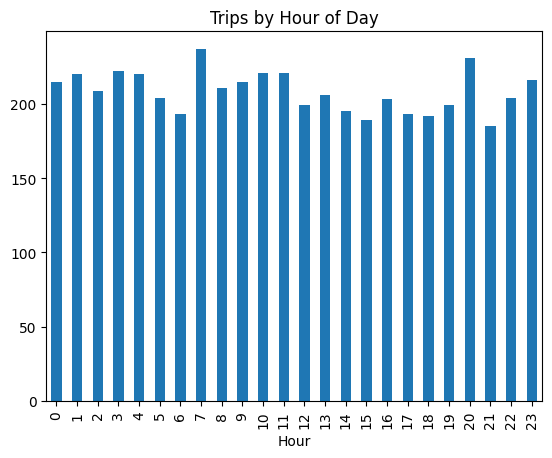

In [ ]:
df["Timestamp"].min(), df["Timestamp"].max()
df["Hour"] = df["Timestamp"].dt.hour
df["Weekday"] = df["Timestamp"].dt.day_name()

df["Hour"].value_counts().sort_index().plot(kind="bar", title="Trips by Hour of Day")

## **30. Distribution of Trips Across Months (Countplot)**

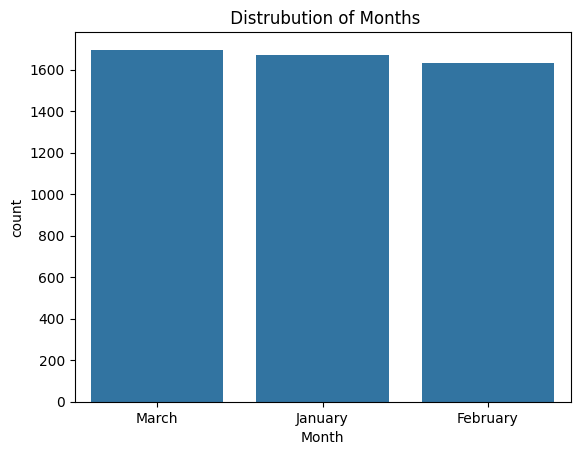

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Month',data=df)
plt.title(" Distrubution of Months")
plt.show()

## **31.  Distribution of Trips Across Weekdays (Countplot)**

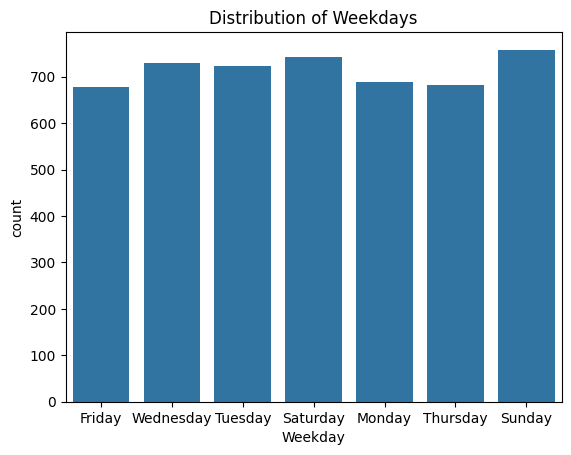

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Weekday', data=df)
plt.title("Distribution of Weekdays")
plt.show()

## **32. Saving the Fully Cleaned Dataset to CSV**

In [ ]:
df.to_csv("uber_trips_fully_cleaned.csv", index=False)
print("Cleaned dataset saved ")

Cleaned dataset saved 


## **33. Bar Chart of Trip Counts by Weekday**

<Axes: title={'center': 'Trips by Weekday'}, xlabel='Weekday'>

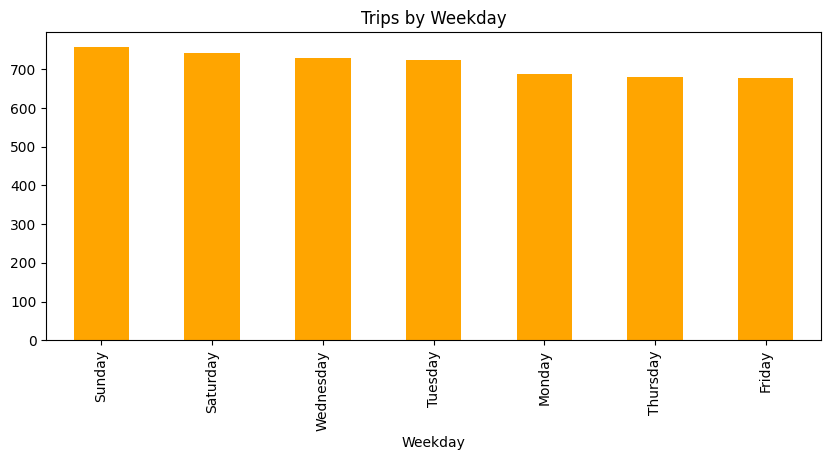

In [ ]:
df["Weekday"].value_counts().plot(kind="bar", figsize=(10,4), title="Trips by Weekday", color="orange")

## **34. Distribution of Trips by Hour of Day (Countplot), Trips by Weekday (Ordered Countplot), Trips by Vehicle Type (Countplot), Correlation Matrix of Numerical Features**

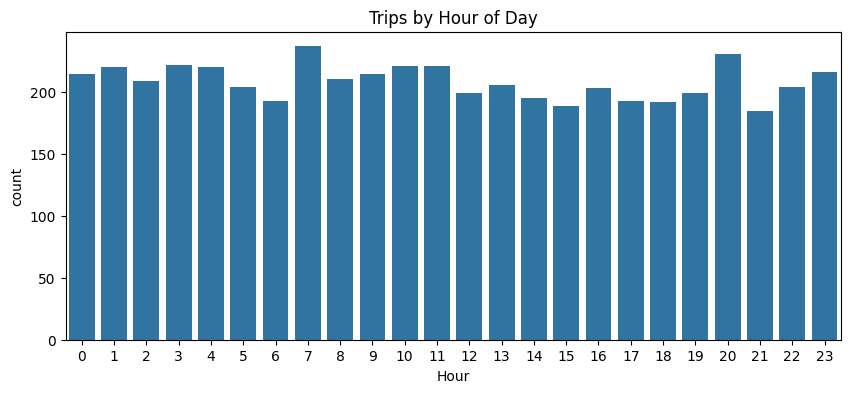

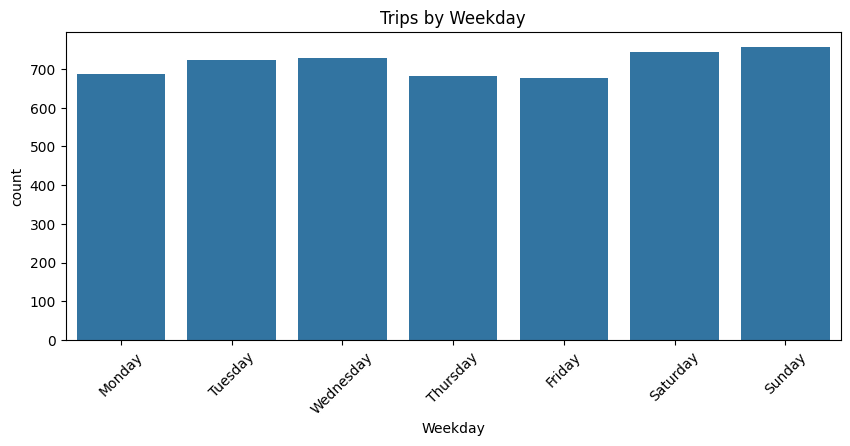

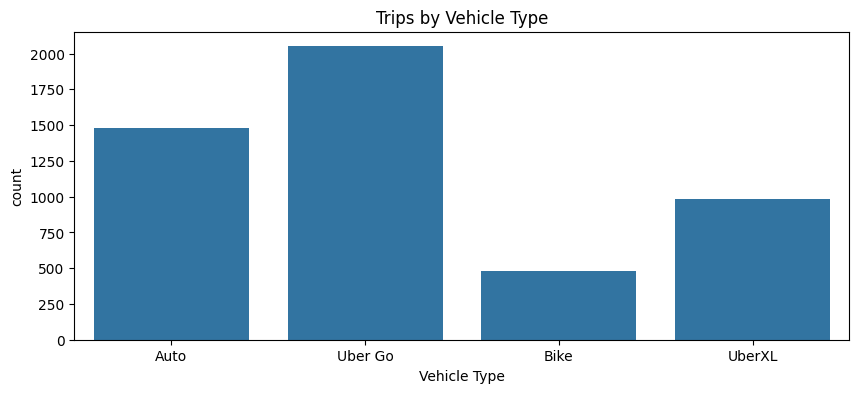

,Trip ID,Pickup Latitude,Pickup Longitude,Drop Latitude,Drop Longitude,Distance (Km),Trip Duration (Min),Fare (INR),Is Shared,Hour
Trip ID,1.000000,0.009902,-0.001887,0.014194,0.014574,-0.010877,-0.001015,-0.012633,0.006090,0.007081
Pickup Latitude,0.009902,1.000000,0.128214,0.093530,0.035633,-0.015078,-0.029982,-0.015217,0.010666,0.002932
Pickup Longitude,-0.001887,0.128214,1.000000,0.034773,0.088905,-0.204802,-0.191597,-0.196560,-0.013341,-0.014615
Drop Latitude,0.014194,0.093530,0.034773,1.000000,0.121884,-0.013853,-0.016952,-0.017069,0.002057,0.017133
Drop Longitude,0.014574,0.035633,0.088905,0.121884,1.000000,-0.204756,-0.183673,-0.200815,0.008830,0.010505
Distance (Km),-0.010877,-0.015078,-0.204802,-0.013853,-0.204756,1.000000,0.874552,0.932604,0.005512,0.003147
Trip Duration (Min),-0.001015,-0.029982,-0.191597,-0.016952,-0.183673,0.874552,1.000000,0.841961,0.001772,-0.000963
Fare (INR),-0.012633,-0.015217,-0.196560,-0.017069,-0.200815,0.932604,0.841961,1.000000,-0.002526,-0.003895
Is Shared,0.006090,0.010666,-0.013341,0.002057,0.008830,0.005512,0.001772,-0.002526,1.000000,0.030125
Hour,0.007081,0.002932,-0.014615,0.017133,0.010505,0.003147,-0.000963,-0.003895,0.030125,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.countplot(x=df["Hour"])
plt.title("Trips by Hour of Day")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x=df["Weekday"], order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=45)
plt.title("Trips by Weekday")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x=df["Vehicle Type"])
plt.title("Trips by Vehicle Type")
plt.show()

df.corr(numeric_only=True)

## **35. Demand Heatmap: Trips by Hour vs Weekday**

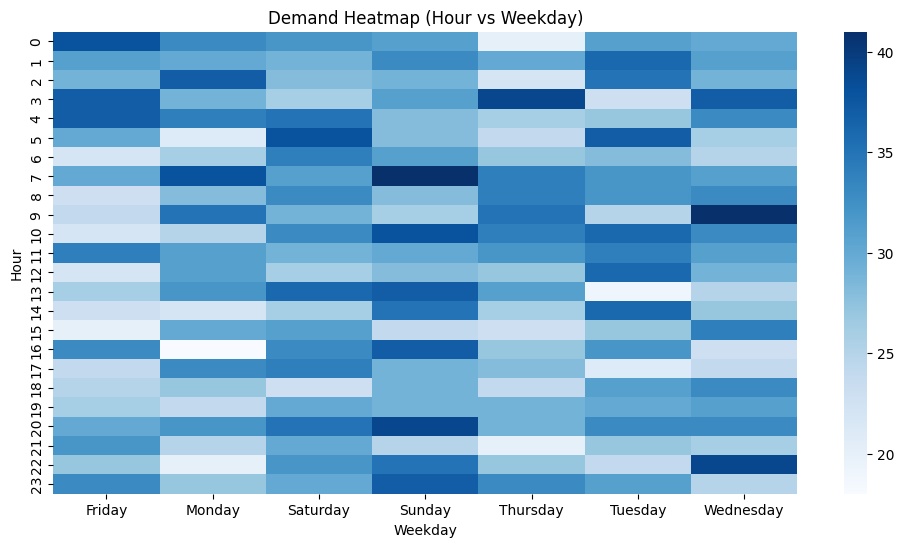

In [ ]:
pivot = df.pivot_table(index="Hour", columns="Weekday", values="Trip ID", aggfunc="count")
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Demand Heatmap (Hour vs Weekday)")
plt.show()

## **36. Fare per Km Comparison Across Vehicle Types (Boxplot)**

/tmp/ipython-input-3559517636.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Vehicle Type"], y=df["Fare per Km"], palette="Set2")


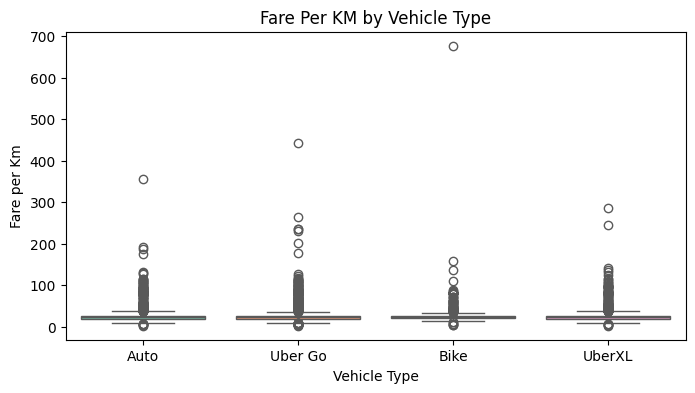

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Fare per Km' column exists and is correctly named
# Check if base columns for calculation are present (they should be after previous renames)
if 'Fare (INR)' in df.columns and 'Distance (Km)' in df.columns:
    # Create 'fare_per_km' (temporary name if needed)
    if 'fare_per_km' not in df.columns and 'Fare per Km' not in df.columns:
        df['fare_per_km'] = df['Fare (INR)'] / df['Distance (Km)']

    # If 'fare_per_km' exists but 'Fare per Km' doesn't, rename it
    if 'fare_per_km' in df.columns and 'Fare per Km' not in df.columns:
        df = df.rename(columns={'fare_per_km': 'Fare per Km'})
    # If it was already named 'Fare per Km' from a previous run (e.g. from an earlier cell),
    # we don't need to do anything.

plt.figure(figsize=(8,4))
sns.boxplot(x=df["Vehicle Type"], y=df["Fare per Km"], palette="Set2")
plt.title("Fare Per KM by Vehicle Type")
plt.show()

## **37.  Interactive Dashboard: Filter Trips by Vehicle Type (Plotly + ipywidgets)**

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown

df = pd.read_csv("uber_trips_cleaned.csv")

@interact(
    vehicle=Dropdown(options=["All"] + sorted(df["vehicle_type"].unique()), description="Vehicle:")
)
def update(vehicle):
    # Apply filter
    filtered = df if vehicle == "All" else df[df["vehicle_type"] == vehicle]

    # Chart 1: Trips by Hour
    fig1 = px.histogram(filtered, x="hour", title="Trips by Hour")
    fig1.show()

    # Chart 2: Trips by Weekday
    fig2 = px.histogram(filtered, x="weekday", title="Trips by Weekday")
    fig2.show()

    # Chart 3: Trips by Vehicle Type
    fig3 = px.histogram(filtered, x="vehicle_type", title="Trips by Vehicle Type")
    fig3.show()

interactive(children=(Dropdown(description='Vehicle:', options=('All', 'Auto', 'Bike', 'Uber Go', 'UberXL'), v…

## **38. Importing Display Utility for Rendering Outputs in Jupyter Notebook**

In [ ]:
from IPython.display import display

## **39. Advanced Interactive Dashboard with Multi-Filter (Vehicle Type + Weekday) Using Plotly & ipywidgets**

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown
from IPython.display import display

df = pd.read_csv("uber_trips_cleaned.csv")

# Ensure weekday is string for filtering
df["weekday"] = df["weekday"].astype(str)

@interact(
    vehicle=Dropdown(options=["All"] + sorted(df["vehicle_type"].unique()), description="Vehicle:"),
    weekday=Dropdown(options=["All"] + sorted(df["weekday"].unique()), description="Weekday:")
)
def update(vehicle, weekday):

    # Filter dataset
    filtered = df.copy()
    if vehicle != "All":
        filtered = filtered[filtered["vehicle_type"] == vehicle]
    if weekday != "All":
        filtered = filtered[filtered["weekday"] == weekday]

    # CHART 1 — Trips by Hour (Blue)
    fig1 = px.histogram(
        filtered,
        x="hour",
        title=f"Trips by Hour ({vehicle}, {weekday})",
        color_discrete_sequence=["#1f77b4"]  # Blue
    )
    display(fig1)

    # CHART 2 — Trips by Weekday (Green)
    fig2 = px.histogram(
        filtered,
        x="weekday",
        title=f"Trips by Weekday ({vehicle}, {weekday})",
        color_discrete_sequence=["#2ca02c"]  # Green
    )
    display(fig2)

    # CHART 3 — Trips by Vehicle Type (Orange)
    fig3 = px.histogram(
        filtered,
        x="vehicle_type",
        title=f"Trips by Vehicle Type ({vehicle}, {weekday})",
        color_discrete_sequence=["#ff7f0e"]  # Orange
    )
    display(fig3)

interactive(children=(Dropdown(description='Vehicle:', options=('All', 'Auto', 'Bike', 'Uber Go', 'UberXL'), v…

## **40. Pickup and Drop-off Location Maps**

In [ ]:
# Pickup Map
fig4 = px.scatter_mapbox(
    df,
    lat="pickup_lat",
    lon="pickup_lng",
    color="pickup_zone",
    zoom=10,
    title="Pickup Locations Map",
    height=600
)

fig4.update_layout(mapbox_style="open-street-map")
fig4.show()

# Drop Map
fig5 = px.scatter_mapbox(
    df,
    lat="drop_lat",
    lon="drop_lng",
    color="drop_zone",
    zoom=10,
    title="Drop Locations Map",
    height=600
)

fig5.update_layout(mapbox_style="open-street-map")
fig5.show()

## **41. Distance vs Fare Scatter Plot**

In [ ]:
fig6 = px.scatter(
    df,
    x="distance_km",
    y="fare_inr",
    color="vehicle_type",
    title="Distance vs Fare Scatter Plot",
    labels={"distance_km": "Distance (km)", "fare_inr": "Fare (INR)"},
    height=500
)

fig6.show()

## **42. Advanced Interactive Uber Trips Dashboard**

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Dropdown
from IPython.display import display, clear_output

df = pd.read_csv("uber_trips_chennai_cleaned.csv")

df["weekday"] = df["weekday"].astype(str)

BLUE = ["#1f77b4"]   # your selected blue color

@interact(
    vehicle=Dropdown(options=["All"] + sorted(df["vehicle_type"].unique()), description="Vehicle:"),
    weekday=Dropdown(options=["All"] + sorted(df["weekday"].unique()), description="Weekday:")
)
def dashboard(vehicle, weekday):

    clear_output(wait=True)
    print("📊 Uber Trips Dashboard — Filtered Results")

    # Filtering
    temp = df.copy()
    if vehicle != "All":
        temp = temp[temp["vehicle_type"] == vehicle]

    if weekday != "All":
        temp = temp[temp["weekday"] == weekday]

    print(f"Total trips: {len(temp)}")

    # Trips by Hour (Blue)
    fig1 = px.bar(
        temp.groupby("hour").size().reset_index(name="count"),
        x="hour", y="count",
        title="Trips by Hour",
        color_discrete_sequence=BLUE
    )
    display(fig1)

    # Trips by Weekday (Blue)
    fig2 = px.bar(
        temp.groupby("weekday").size().reset_index(name="count"),
        x="weekday", y="count",
        title="Trips by Weekday",
        color_discrete_sequence=BLUE
    )
    display(fig2)

    # Trips by Vehicle Type (Blue)
    fig3 = px.bar(
        temp.groupby("vehicle_type").size().reset_index(name="count"),
        x="vehicle_type", y="count",
        title="Trips by Vehicle Type",
        color_discrete_sequence=BLUE
    )
    display(fig3)

    # Distance vs Fare Scatter Plot (Blue)
    fig4 = px.scatter(
        temp,
        x="distance_km",
        y="fare_inr",
        title="Distance vs Fare (Scatter Plot)",
        color_discrete_sequence=BLUE
    )
    display(fig4)

interactive(children=(Dropdown(description='Vehicle:', options=('All', 'Auto', 'Bike', 'Uber Go', 'UberXL'), v…